## Intro

<br>
We want to simulate a new type of hedge fund model. 
<br>
We want to improve two points in the current hedge fund industry. 
<br>
<br/>

--First, we want to have a model that discourages short term thinking 
and encourages long term thinking. We want to have a model that ensures
the traders/strategy developers aim for maximizing total reward on a time horizon of 10+ years 
from the start. In other words, maximizing one year return and aiming for high year-end bonus is 
structurally discouraged. 
<br>
<br>
--Second, we think the best use of a hedge fund's profit is not paying a strar trader/strategy 
developer millions of dollars in compensation. We are not against high pay. However, we think 
accumulating money after certain level has diminishing return on the society as a whole. 
We think one way for better use of the profit of a hedge fund for the society as a whole 
is to expand the human knowledge frontier and educate the next generation. 

## Solution

<br>
Here, we want to solve the two problems mentioned. 

<br>
<br/>
* How to better distribute profit?
<br>
The hedge fund will invite professors to join the hedge fund. In a traditional 2-20 hedge fund pay
structure, the hedge fund will receive the 2 percent management fee, and the 20 percent performance 
fee will go to the professors' research groups in the university. 
<br>
Suppose a professor takes a leave of absence from a university for 1 year or takes a 
sabbatical leave and decides to join the hedge fund during the leave period, the professor 
would work along with in house scientists and develop new quantative trading strategies. 
Of course, no trading strategy would work forever. However, during the period when the 
strategy is generating high returns, most of the returns would go to the professor's research 
group in the home university. Some of the returns would be given back to professors who had previously served as
visiting scientists at the hedge fund. 
<br>
In the end of this simulation, we showed that the hedge fund would be able to donate to 250 distinct research
groups and on average a research group would receive 1.8 million in 10 years. 


<br>
<br/>
* How to ensure the objective is long term total return?
<br>
A professor's research group would receive donations from two sources. Returns from strategies developed while serving as a visiting scientist and returns from strategies developed from other professors who later joined the hedge fund. Therefore, a research group's total donations would be the sum of many years of return. Some may come from his/her own strategies and some may come from other professors. 
<br>
Therefore, a professor would not be incentivized to develop regime-specific quantative strategies and maximize short term profit and risk future return because the professor knows that his/her research group would continue to receive donations based on strategies developed by future visiting scientists, which relies on good capital appreciation/perservation from previous generations' visiting scientists/professors. 

<br>
<br/>
* Extra benefit from this hedge fund structure. 
<br>
The hedge fund is now consistently incorporating the newest ideas. The hedge fund should have a competative advantage for its quantative strageties. 
The hedge fund would benefit from two perspectives. First, the professors would come from different universities 
and different academic disciplines. Combining the best ideas from different places should be a plus. 
Second, the professors would join the hedge fund as visiting scientists on a rolling basis. Therefore, 
the professors would continually bring newsest ideas to the hedge fund. 

## Simulation
<br>
Now, we will simulate a hedge based on this structure. 
<br>
* We will simulate the frequency of new visiting professors as a random process. 
<br>
* We will assume minimal start up capital and simulate new capital injection for the hedge fund as a random process. 
<br>
* We will simulate the success of new quantative strategies as a random process. 
<br>
* we will also allow for variable market conditions during the simulation. 
<br>
Finally, we will look at the total return for the hedge fund and total donation to university research groups. 
<br>
The simulation length is 10 years.

Note:
1. Throughout this simulation, the unit is million of USD

In [1]:
import random
random.seed(1)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import numpy as np

# Frequency of new visiting professors as a random process.

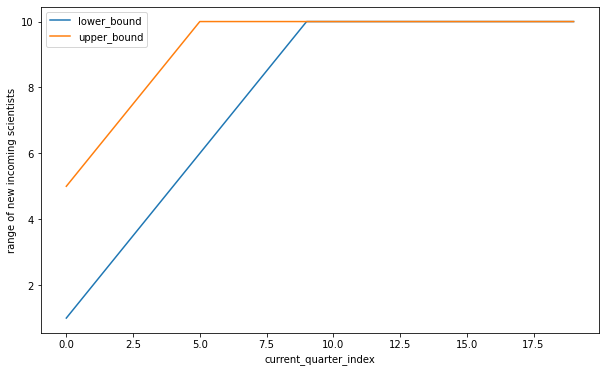

In [2]:
# We suppose there will be new visiting scientists each quarter. 
# The main thrust of is that we assume as the platform 
# becomes more mature, the number of new visiting scientists per quarter
# increases until some upper bound. 

#parameters
num_of_new_incoming_scientists_lower_bound_base = 1 #in unit of number
num_of_new_incoming_scientists_upper_bound_base = 5 #in unit of number
new_incoming_scientists_ramp_up_rate = int(1.5) #in unit of number per quarter
max_of_num_of_new_incoming_scientists = 10 #in unit of number

quarter_indices = []
num_of_new_incoming_scientists_lower_bound = []
num_of_new_incoming_scientists_upper_bound = []

for current_quarter_index in range(0,20):
    quarter_indices.append(current_quarter_index)
    num_of_new_incoming_scientists_lower_bound.append(min(num_of_new_incoming_scientists_lower_bound_base+\
                                                      new_incoming_scientists_ramp_up_rate*current_quarter_index,\
                                                      max_of_num_of_new_incoming_scientists))
    num_of_new_incoming_scientists_upper_bound.append(min(num_of_new_incoming_scientists_upper_bound_base+\
                                                      new_incoming_scientists_ramp_up_rate*current_quarter_index,\
                                                      max_of_num_of_new_incoming_scientists))
    
    
    
plt.plot(quarter_indices,num_of_new_incoming_scientists_lower_bound,label = 'lower_bound')
plt.plot(quarter_indices,num_of_new_incoming_scientists_upper_bound,label = 'upper_bound')
plt.xlabel("current_quarter_index")
plt.ylabel("range of new incoming scientists")
plt.legend()
plt.show()

def generate_num_of_new_incoming_scientists(current_quarter_index,\
                                            num_of_new_incoming_scientists_lower_bound_base,\
                                            num_of_new_incoming_scientists_upper_bound_base,\
                                            new_incoming_scientists_ramp_up_rate,\
                                            max_of_num_of_new_incoming_scientists):
    
    num_lower_bound = min(num_of_new_incoming_scientists_lower_bound_base+\
                      new_incoming_scientists_ramp_up_rate*current_quarter_index,\
                      max_of_num_of_new_incoming_scientists)
    
    num_upper_bound = min(num_of_new_incoming_scientists_upper_bound_base+\
                      new_incoming_scientists_ramp_up_rate*current_quarter_index,\
                      max_of_num_of_new_incoming_scientists)

    return random.randint(num_lower_bound, num_upper_bound)

# Simulate new capital for the hedge fund as a random process.

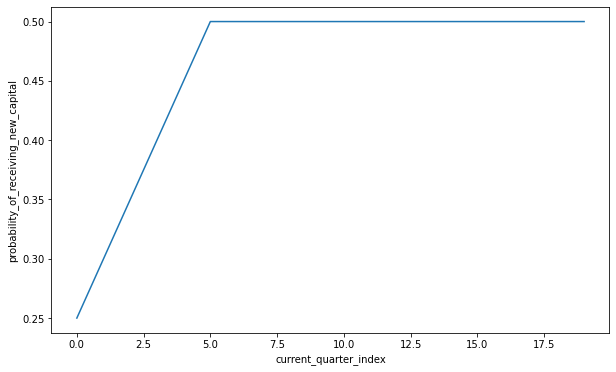

In [3]:
# we suppose the probability of successfully finding new investor 
# per quarter as a function of time follows the following function. 
# The main thrust of this function is that we assume as the platform 
# becomes more mature, the probability increases until some upper bound. 

#parameters
new_capital_ramping_up_rate = 0.05 #in unit of probability per quarter
new_capital_base_prob = 0.25 #in unit of probability
new_capital_distribution_bounds = [10, 500] #in unit of millions
max_prob_new_capital_per_quarter = 0.5 #in unit of probability

quarter_indices = []
prob_of_receiving_new_capital_per_quarter = []
for current_quarter_index in range(0,20):
    quarter_indices.append(current_quarter_index)
    prob_of_receiving_new_capital_per_quarter.append(min(new_capital_base_prob+new_capital_ramping_up_rate*current_quarter_index,\
                                                         max_prob_new_capital_per_quarter))

plt.plot(quarter_indices,prob_of_receiving_new_capital_per_quarter)
plt.xlabel("current_quarter_index")
plt.ylabel("probability_of_receiving_new_capital")
plt.show()

def prob_of_new_capital(current_quarter_index,\
                        new_capital_base_prob,\
                        new_capital_ramping_up_rate,\
                        max_prob_new_capital_per_quarter):
    
    prob_of_receiving_new_capital = min(new_capital_base_prob+new_capital_ramping_up_rate*current_quarter_index,\
                                        max_prob_new_capital_per_quarter)
    
    prob_of_not_receiving_new_capital = 1-prob_of_receiving_new_capital
    
    r = random.choices([True,False],\
                       weights = [prob_of_receiving_new_capital,prob_of_not_receiving_new_capital])
    return r[0]
    
    

# Simulate the success of new quantative strategies as a random process.

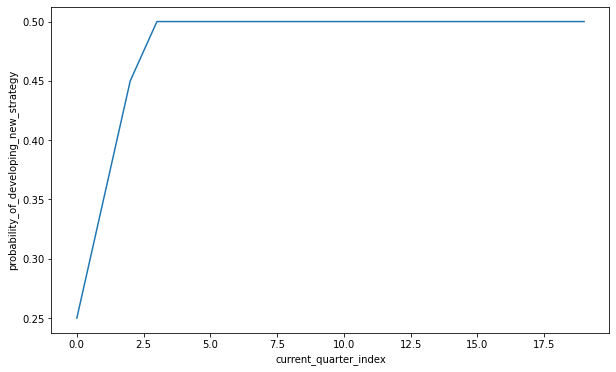

In [4]:
# we suppose the probability of successfully inventing a new strategy
# per quarter per research group as a function of time follows the following function. 
# The main thrust of this function is that we assume as the platform 
# becomes more mature, the probability increases until some upper bound. 

#parameters
max_prob_new_strategy_per_quarter = 0.5 #in unit of probability
new_strategy_ramping_up_rate = 0.1 #in unit of probability per quarter
new_strategy_base_prob = 0.25 #in unit of probability


quarter_indices = []
prob_of_developing_new_strategy_per_quarter = []
for current_quarter_index in range(0,20):
    quarter_indices.append(current_quarter_index)
    prob_of_developing_new_strategy_per_quarter.append(min(new_strategy_base_prob+new_strategy_ramping_up_rate*current_quarter_index,\
                                                           max_prob_new_strategy_per_quarter))

plt.plot(quarter_indices,prob_of_developing_new_strategy_per_quarter)
plt.xlabel("current_quarter_index")
plt.ylabel("probability_of_developing_new_strategy")
plt.show()

def prob_of_new_strategy(group_launch_quarter,\
                         current_quarter_index,\
                         new_strategy_base_prob,\
                         new_strategy_ramping_up_rate,\
                         max_prob_new_strategy_per_quarter):
    
    quarter_history = current_quarter_index-group_launch_quarter
    
    prob_of_developing_new_strategy = min(new_strategy_base_prob+new_strategy_ramping_up_rate*quarter_history,\
                                          max_prob_new_strategy_per_quarter)
    prob_of_not_developing_new_strategy = 1-prob_of_developing_new_strategy
    
    r = random.choices([True,False],\
                       weights = [prob_of_developing_new_strategy,prob_of_not_developing_new_strategy])
    return r[0]
    
    

In [5]:
def generating_one_incoming_scientist(scientist_index,\
                                      starting_term,\
                                      term_length_lower_bound,\
                                      term_length_upper_bound):
    
    term_length = random.randint(term_length_lower_bound,term_length_upper_bound)
    scientist_info = {}
    scientist_info['name'] = scientist_index
    scientist_info['term_length'] = term_length
    scientist_info['starting_term'] = starting_term
    scientist_info['num_of_created_strategies'] = 0
    return scientist_info

In [6]:
class generate_new_research_group():
    
    def __init__(self,group_launch_quarter):
        self.scientists_affiliated_with_group = []
        self.group_launch_quarter = group_launch_quarter
    
    def add_scientist(self,scientist_info):
        self.scientists_affiliated_with_group.append(scientist_info)
        
    def retire_scientist(self,scientist_info):
        self.scientists_affiliated_with_group.remove(scientist_info)
    
    def get_scientists(self):
        return self.scientists_affiliated_with_group
    
    def get_group_launch_quarter(self):
        return self.group_launch_quarter

In [7]:
class generate_new_strategy():
    #this class defines the characteristics of a new strategy
    
    def __init__(self,capacity_bounds,annual_return_bounds,valid_time_bounds):
        self.capacity = random.uniform(capacity_bounds[0], capacity_bounds[1])
        self.annual_return = random.uniform(annual_return_bounds[0],annual_return_bounds[1])
        self.quarterly_return = (1+self.annual_return)**(1/4)-1
        self.valid_time = random.randint(valid_time_bounds[0],valid_time_bounds[1])
        self.remaining_valid_time = self.valid_time
        self.working_scientists = None
        
    def set_parameters(self,capacity,annual_return,valid_time,working_scientists):
        #override the random parameters of the strategy characteristics
        self.capacity = capacity
        self.annual_return = annual_return
        self.quarterly_return = (1+self.annual_return)**(1/4)-1
        self.valid_time = valid_time
        self.remaining_valid_time = self.valid_time
        self.working_scientists = working_scientists

    def decrease_valid_time(self):
        self.remaining_valid_time -= 1
        
    def is_strategy_expired(self):
        if self.remaining_valid_time <= 0:
            return True
        else:
            return False
    
    def get_quarterly_return(self):
        return self.quarterly_return
    
    def get_capacity(self):
        return self.capacity
    
    def set_working_scientists(self,input_scientists):
        self.working_scientists = input_scientists
    
    def get_working_scientists(self):
        return self.working_scientists

Driver code for the simulation

In [8]:
#other parameters used during the simulation

new_scientist_term_length_bound = [2,4] #in unit of quarter
#can be a random number between 0.1 billion to 1 billion
#or 100 million to 1000 million
individual_strategy_capacity_bounds = [100, 500]
#we suppose the annual return of a new strategy
#will be a random number between 2% to 20%
individual_strategy_annual_return_bounds = [0.02,0.2]
#suppose a new strategy has a valid time between 
#4 quarters and 12 quarters. (1-3 valid years)
individual_strategy_valid_time_bounds = [4,12]

init_total_capital = 100
max_capacity_bound = 10000
new_capital_distribution_bounds = [10, 500]

current_scientists_percentage = 0.7
past_scientists_percentage = 0.3
platform_percentage = 1-current_scientists_percentage-past_scientists_percentage
investor_percentage = 0.8
platform_management_fee_percentage = 0.02
platform_management_fee_percentage_per_quarter = (1+platform_management_fee_percentage)**(1/4)-1
market_fluctuation_mean = 0.0
market_fluctuation_standard_deviation = 0.05
market_fluctuation_skew = -0.1

In [9]:
from scipy.stats import skewnorm

def main_simulation():

    past_scientists = []
    scientists_dividends = {}
    current_research_groups = []
    current_total_capital = init_total_capital
    remaining_capital = current_total_capital
    current_scientist_index = 0
    all_current_valid_strategies = []
    capital_for_each_strategy = []

    #tracking parameters
    platform_revenue_history = []
    remaining_capital_history = []
    valid_strategy_history = []
    total_capital_history = []

    for quarter_index in range(0,40):

        #form a new research group when there is remaining capital
        if remaining_capital > 0:
            new_research_group = generate_new_research_group(quarter_index)
            current_research_groups.append(new_research_group)


        #num of new incoming scientists
        num_of_new_incoming_scientists = generate_num_of_new_incoming_scientists(quarter_index,\
                                                        num_of_new_incoming_scientists_lower_bound_base,\
                                                        num_of_new_incoming_scientists_upper_bound_base,\
                                                        new_incoming_scientists_ramp_up_rate,\
                                                        max_of_num_of_new_incoming_scientists)
        new_incoming_scientists = []
        for _ in range(num_of_new_incoming_scientists):
            new_scientist = generating_one_incoming_scientist(current_scientist_index,\
                                                              quarter_index,\
                                                              new_scientist_term_length_bound[0],\
                                                              new_scientist_term_length_bound[1])
            current_scientist_index += 1
            new_incoming_scientists.append(new_scientist)
            scientists_dividends[new_scientist['name']] = 0


        #add a scientist to a research group
        for scientist in new_incoming_scientists:
            picked_research_group_index = random.randint(0,len(current_research_groups)-1)
            picked_research_group = current_research_groups[picked_research_group_index]
            picked_research_group.add_scientist(scientist)


        #generate new strategy
        for research_group in current_research_groups:
            if prob_of_new_strategy(research_group.get_group_launch_quarter(),\
                                     quarter_index,\
                                     new_strategy_base_prob,\
                                     new_strategy_ramping_up_rate,\
                                     max_prob_new_strategy_per_quarter):

                new_strategy = generate_new_strategy(individual_strategy_capacity_bounds,\
                                                     individual_strategy_annual_return_bounds,\
                                                     individual_strategy_valid_time_bounds)
                new_strategy.set_working_scientists(research_group.get_scientists())
                all_current_valid_strategies.append(new_strategy)
                for scientist in research_group.get_scientists():
                    scientist['num_of_created_strategies'] += 1


        #accept new capital
        if current_total_capital < max_capacity_bound:
            if prob_of_new_capital(quarter_index,\
                                   new_capital_base_prob,\
                                   new_capital_ramping_up_rate,\
                                   max_prob_new_capital_per_quarter):

                new_capital_amount = random.uniform(new_capital_distribution_bounds[0], \
                                                    new_capital_distribution_bounds[1])
                current_total_capital += new_capital_amount


        #sort strategy by decreasing quarterly return
        all_current_valid_strategies = sorted(all_current_valid_strategies,\
                                              key = lambda x:x.get_quarterly_return(),\
                                              reverse = True)

        #reallocate capital
        remaining_capital = current_total_capital
        for strategy in all_current_valid_strategies:
            max_capacity = strategy.get_capacity()
            if remaining_capital > max_capacity:
                capital_for_each_strategy.append(max_capacity)
                remaining_capital -= max_capacity
            else:
                if remaining_capital > 0:
                    capital_for_each_strategy.append(remaining_capital)
                    remaining_capital -= remaining_capital
                else:
                    capital_for_each_strategy.append(0)


        #distribute return
        quarter_total_return_for_past_scientists = 0
        quarter_platform_revenue = 0
        quarter_random_fluctuation = skewnorm.rvs(a = market_fluctuation_skew, loc=market_fluctuation_mean, scale=market_fluctuation_standard_deviation)
        for index,strategy in enumerate(all_current_valid_strategies):
            ###
            ### Here, we allow the actual market condition to vary
            ### the quarter random fluctuation for each strategy is correlated due to general market condition
            realized_quarterly_return = strategy.get_quarterly_return()+quarter_random_fluctuation
            quarter_return = realized_quarterly_return*capital_for_each_strategy[index]

            #assume investor put money back
            current_total_capital += quarter_return*investor_percentage

            quarter_return_after_investor = quarter_return*(1-investor_percentage)
            quarter_return_for_current_scientists = quarter_return_after_investor*current_scientists_percentage
            quarter_return_for_past_scientists = quarter_return_after_investor*past_scientists_percentage
            quarter_return_for_platform = quarter_return_after_investor*platform_percentage

            #for past scientists
            quarter_total_return_for_past_scientists += quarter_return_for_past_scientists

            num_of_current_scientists = len(strategy.get_working_scientists())
            for scientist in strategy.get_working_scientists():
                scientists_dividends[scientist['name']] += quarter_return_for_current_scientists/num_of_current_scientists

            #platform_revenue
            quarter_platform_revenue += quarter_return_for_platform

        for scientist in past_scientists:
            scientists_dividends[scientist['name']] += quarter_total_return_for_past_scientists/len(past_scientists)

        #management fee
        quarter_management_fee = current_total_capital*platform_management_fee_percentage_per_quarter
        current_total_capital *= 1-platform_management_fee_percentage_per_quarter
        quarter_platform_revenue += quarter_management_fee
        platform_revenue_history.append(quarter_platform_revenue)

        #retire scientist
        for research_group in current_research_groups:
            retiring_scientists = []
            for scientist in research_group.get_scientists():
                if scientist['term_length'] + scientist['starting_term'] > quarter_index:
                    retiring_scientists.append(scientist)
            for scientist in retiring_scientists:
                research_group.retire_scientist(scientist)
                if scientist['num_of_created_strategies'] > 0:
                    past_scientists.append(scientist)


        #retire strategy
        still_valid_strategies = []
        for strategy in all_current_valid_strategies:
            strategy.decrease_valid_time()
            if strategy.is_strategy_expired() == False:
                still_valid_strategies.append(strategy)
        all_current_valid_strategies = still_valid_strategies

        remaining_capital_history.append(remaining_capital)
        valid_strategy_history.append(len(all_current_valid_strategies))
        total_capital_history.append(current_total_capital)
        
    return scientists_dividends,platform_revenue_history,current_total_capital



In [10]:
scientists_dividends,platform_revenue_history,current_total_capital = main_simulation()

Result for one simulation

total_university_lab_donation is 386.15756195132525 million USD
avg individual lab donation is 2.3644452420123128 million USD
number of benefited labs 230


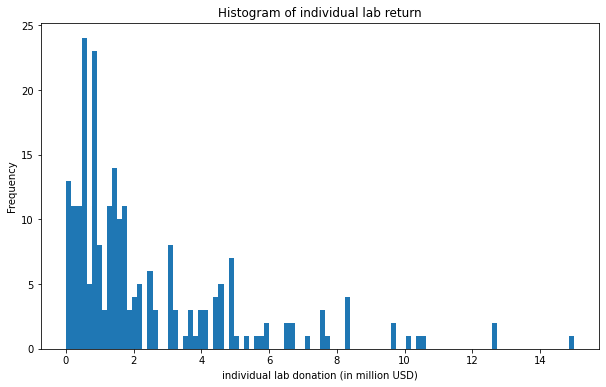

In [11]:
total_university_lab_return = 0
scientist_return_distribution = []
for key in scientists_dividends.keys():
    total_university_lab_return += scientists_dividends[key]
    if scientists_dividends[key] > 0:
        scientist_return_distribution.append(scientists_dividends[key])
        
print('total_university_lab_donation is',total_university_lab_return,'million USD')
print('avg individual lab donation is',np.mean(scientist_return_distribution),'million USD')
print('number of benefited labs',len(scientist_return_distribution))
plt.hist(scientist_return_distribution,bins = 100)
plt.title('Histogram of individual lab return')
plt.ylabel('Frequency')
plt.xlabel('individual lab donation (in million USD)')
plt.show()

total platform revenue is 670.8549432783336 million USD


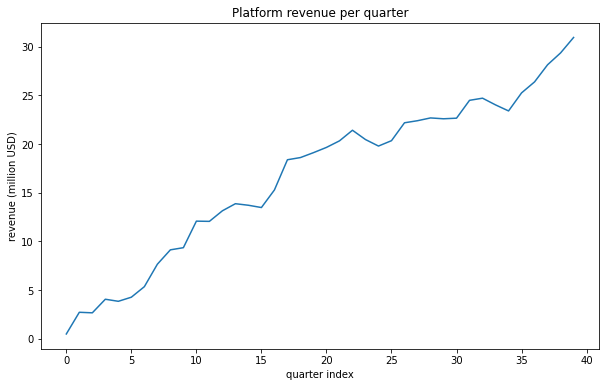

In [12]:
print('total platform revenue is',np.sum(platform_revenue_history),'million USD')

plt.title('Platform revenue per quarter')
plt.ylabel('revenue (million USD)')
plt.xlabel('quarter index')
plt.plot(platform_revenue_history)
plt.show()


# Repeat the simulation for 1000 times

now, we want to run the simulation for 1000 times to get a confidence interval for the key parameters

In [13]:
distribution_of_avg_lab_return = []
distribution_of_num_of_benefited_labs = []
distribution_of_total_platform_revenue = []
hedge_fund_total_aum = []

for _ in range(1000):
    scientists_dividends,platform_revenue_history,current_total_capital = main_simulation()
    
    total_university_lab_return = 0
    scientist_return_distribution = []
    for key in scientists_dividends.keys():
        total_university_lab_return += scientists_dividends[key]
        if scientists_dividends[key] > 0:
            scientist_return_distribution.append(scientists_dividends[key])

    distribution_of_avg_lab_return.append(np.mean(scientist_return_distribution))
    distribution_of_num_of_benefited_labs.append(len(scientist_return_distribution))
    distribution_of_total_platform_revenue.append(np.sum(platform_revenue_history))
    hedge_fund_total_aum.append(current_total_capital)

the 95% confidence interval for the average total research lab donation is
[0.395239 million USD,  4.187471 million USD]
the mean is 1.860308441278049 million USD


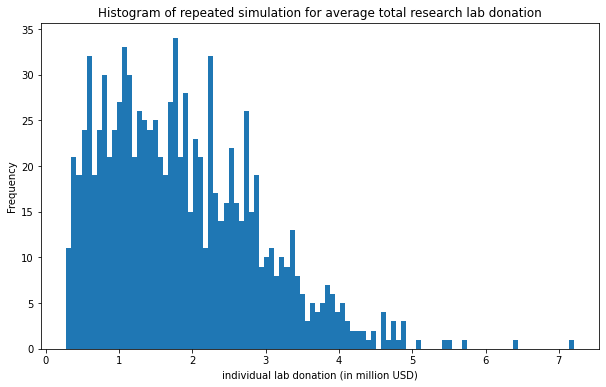

In [14]:


lower_quantile = np.quantile(distribution_of_avg_lab_return, 0.025)
upper_quantile = np.quantile(distribution_of_avg_lab_return,0.975)

print('the 95% confidence interval for the average total research lab donation is')
print('[%f million USD,  %f million USD]'%(lower_quantile,upper_quantile))
print('the mean is',np.mean(distribution_of_avg_lab_return),'million USD')

plt.title('Histogram of repeated simulation for average total research lab donation')
plt.ylabel('Frequency')
plt.xlabel('individual lab donation (in million USD)')
plt.hist(distribution_of_avg_lab_return,bins = 100)
plt.show()

the 95% confidence interval for the number of benefited lab is
[186.000000,  301.000000]
the mean is 249.756


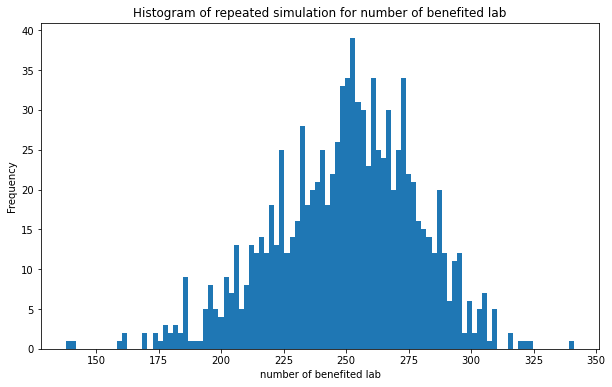

In [15]:


lower_quantile = np.quantile(distribution_of_num_of_benefited_labs, 0.025)
upper_quantile = np.quantile(distribution_of_num_of_benefited_labs,0.975)


print('the 95% confidence interval for the number of benefited lab is')
print('[%f,  %f]'%(lower_quantile,upper_quantile))
print('the mean is',np.mean(distribution_of_num_of_benefited_labs))

plt.title('Histogram of repeated simulation for number of benefited lab')
plt.ylabel('Frequency')
plt.xlabel('number of benefited lab')
plt.hist(distribution_of_num_of_benefited_labs,bins = 100)
plt.show()

the 95% confidence interval for the total platform revenue is
[310.082109 million USD,  970.657302 million USD]
the mean is 592.8820362615522 million USD


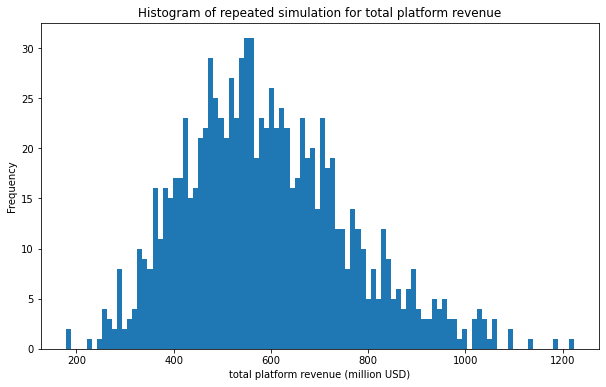

In [16]:

lower_quantile = np.quantile(distribution_of_total_platform_revenue, 0.025)
upper_quantile = np.quantile(distribution_of_total_platform_revenue,0.975)

print('the 95% confidence interval for the total platform revenue is')
print('[%f million USD,  %f million USD]'%(lower_quantile,upper_quantile))
print('the mean is',np.mean(distribution_of_total_platform_revenue),'million USD')

plt.title('Histogram of repeated simulation for total platform revenue')
plt.ylabel('Frequency')
plt.xlabel('total platform revenue (million USD)')

plt.hist(distribution_of_total_platform_revenue,bins = 100)
plt.show()

the 95% confidence interval for the total hedge fund AUM is
[3481.903884 million USD,  9964.878156 million USD]
the mean is 6109.560195997823 million USD


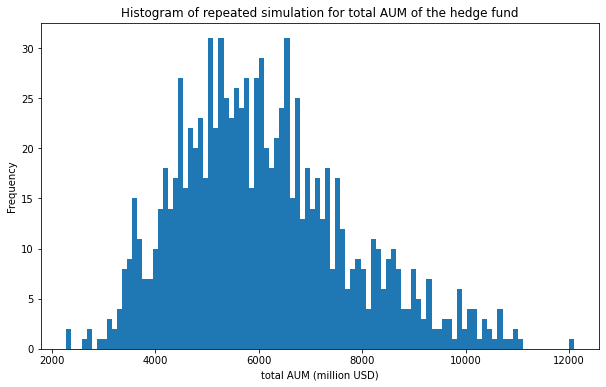

In [17]:

lower_quantile = np.quantile(hedge_fund_total_aum, 0.025)
upper_quantile = np.quantile(hedge_fund_total_aum,0.975)

print('the 95% confidence interval for the total hedge fund AUM is')
print('[%f million USD,  %f million USD]'%(lower_quantile,upper_quantile))
print('the mean is',np.mean(hedge_fund_total_aum),'million USD')



plt.hist(hedge_fund_total_aum,bins = 100)
plt.title('Histogram of repeated simulation for total AUM of the hedge fund')
plt.ylabel('Frequency')
plt.xlabel('total AUM (million USD)')

plt.show()